In [3]:
#import pandas as pd
import numpy as np
#import os
import matplotlib.pyplot as plt
# import image as mpimg
#import cv2
import sklearn
import tensorflow as tf
from sklearn import model_selection
#from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
#from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
#from keras.models import model_from_json
#from keras import backend as K
#from glob import glob
#import random
#import matplotlib.gridspec as gridspec
import seaborn as sns
#import zlib
#import itertools
from tensorflow.keras.utils import plot_model
#from keras.preprocessing import image
#from keras.applications.mobilenet import preprocess_input
#from keras.models import Model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

from keras import optimizers

In [4]:
train_path='/Users/Athithyaraagul/Code/Machine_Learning/Orcal-Cancer-Pic-Data/train/'
test_path='/Users/Athithyaraagul/Code/Machine_Learning/Orcal-Cancer-Pic-Data/test/'
val_set='/Users/Athithyaraagul/Code/Machine_Learning/Orcal-Cancer-Pic-Data/val/'


train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=64,class_mode='categorical')
testing_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=64,class_mode='categorical')
val_set=val_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=64,class_mode='categorical')

FileNotFoundError: [Errno 2] No such file or directory: 'train'

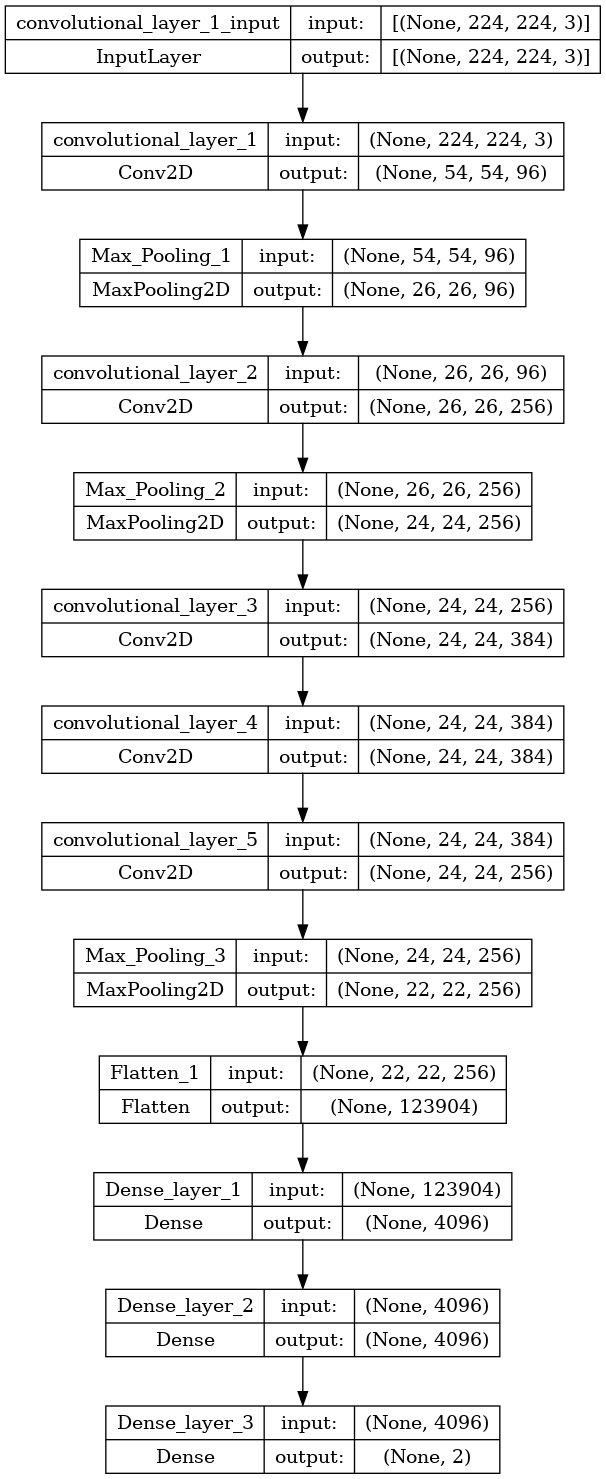

In [3]:
model1=Sequential()

# layer 1: convolutional
model1.add(Conv2D(filters=96,kernel_size=11,strides=4,activation="relu",input_shape=(224,224,3),name='convolutional_layer_1'))

# MaxPool 1
model1.add(MaxPool2D(pool_size=3,strides=2,name='Max_Pooling_1'))

# layer 2: convolutional
model1.add(Conv2D(filters=256,kernel_size=5,strides=1,activation="relu",padding='same',name='convolutional_layer_2'))

# MaxPool 2
model1.add(MaxPool2D(pool_size=3,strides=1,name='Max_Pooling_2'))

# layer 3: convolutional
model1.add(Conv2D(filters=384,kernel_size=3,strides=1,activation="relu",padding='same',name='convolutional_layer_3'))

# layer 4: convolutional
model1.add(Conv2D(filters=384,kernel_size=5,strides=1,activation="relu",padding='same',name='convolutional_layer_4'))

# layer 5: convolutional
model1.add(Conv2D(filters=256,kernel_size=5,strides=1,activation="relu",padding='same',name='convolutional_layer_5'))

# MaxPool 3
model1.add(MaxPool2D(pool_size=3,strides=1,name='Max_Pooling_3'))

# Flatten
model1.add(Flatten(input_shape=(224,224,3),name='Flatten_1'))

# layer 6: Fully Connected
model1.add(Dense(4096,activation='relu',name='Dense_layer_1'))

# layer 7: Fully Connected
model1.add(Dense(4096,activation='relu',name='Dense_layer_2'))

# layer 8: Fully Connected
model1.add(Dense(2,activation='softmax',name='Dense_layer_3'))

# compiling the model
#model1.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=.01),metrics=['accuracy'])

# compiling the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

# printing the blueprint of the model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
# fitting the alexnet model
r1=model1.fit_generator(training_set,validation_data=testing_set,epochs=50,steps_per_epoch=(len(training_set)*0.75),validation_steps=(len(testing_set)))

# keys present in the history
print(r1.history.keys())

/tmp/ipykernel_23/2529727866.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r1=model1.fit_generator(training_set,validation_data=testing_set,epochs=50,steps_per_epoch=(len(training_set)*0.75),validation_steps=(len(testing_set)))


Epoch 1/50
116/116 [==============================] - 144s 1s/step - loss: 7.1525 - accuracy: 0.5123 - val_loss: 0.6771 - val_accuracy: 0.7540
Epoch 2/50
116/116 [==============================] - 98s 840ms/step - loss: 0.6930 - accuracy: 0.5128 - val_loss: 0.6825 - val_accuracy: 0.7540
Epoch 3/50
116/116 [==============================] - 89s 762ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6930 - val_accuracy: 0.7540
Epoch 4/50
116/116 [==============================] - 87s 745ms/step - loss: 0.6932 - accuracy: 0.5051 - val_loss: 0.6870 - val_accuracy: 0.7540
Epoch 5/50
116/116 [==============================] - 85s 728ms/step - loss: 0.6933 - accuracy: 0.4957 - val_loss: 0.6899 - val_accuracy: 0.7540
Epoch 6/50
116/116 [==============================] - 86s 737ms/step - loss: 0.6930 - accuracy: 0.5118 - val_loss: 0.6850 - val_accuracy: 0.7540
Epoch 7/50
116/116 [==============================] - 84s 722ms/step - loss: 0.6930 - accuracy: 0.5094 - val_loss: 0.6847 - val_accu

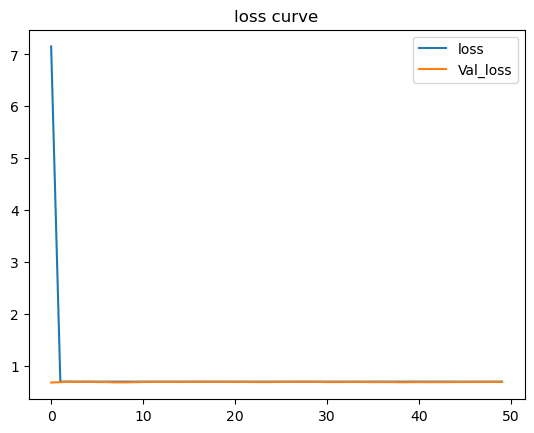

Text(0.5, 1.0, 'Accuracy Evolution')

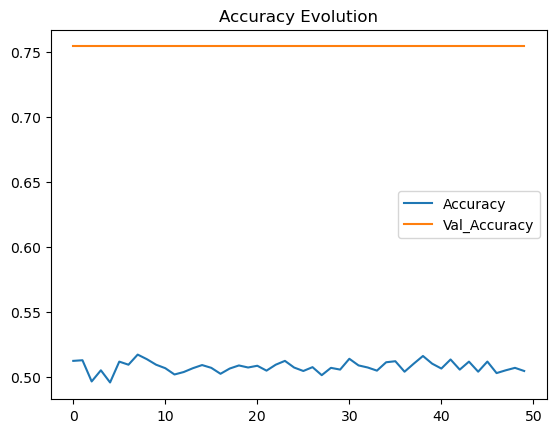

In [5]:
import matplotlib.pyplot as plt

plt.plot(r1.history['loss'],label='loss')
plt.plot(r1.history['val_loss'],label='Val_loss')
plt.title('loss curve')
plt.legend()
plt.show()

plt.plot(r1.history['accuracy'], label='Accuracy')
plt.plot(r1.history['val_accuracy'], label='Val_Accuracy')
plt.title('accuracy curve')
plt.legend()
plt.title('Accuracy Evolution')

In [6]:
evaluation=model1.evaluate(testing_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation=model1.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

4/4 [==============================] - 6s 1s/step - loss: 0.6875 - accuracy: 0.7540
Test Accuracy: 75.40%
155/155 [==============================] - 100s 644ms/step - loss: 0.6930 - accuracy: 0.5077
Train Accuracy: 50.77%
